In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', ' '))

In [2]:
db_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'datalab.sqlite')
db_path

'/home/julie/code/RonanB400/decp_ml/data/datalab.sqlite'

In [53]:
conn = sqlite3.connect(db_path)
db = conn.cursor()
query = f"""
SELECT *
FROM "data.gouv.fr.2022.clean"
"""

data = pd.read_sql_query(query, conn)


# Dataset exploration

In [4]:
data

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,titulaire_nom,titulaire_siren,...,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data
0,2154005160001320242024-LOT04,20242024-LOT04,Marché,21540051600013,COMMUNE DE BATILLY,215400516,78885470100018,SIRET,ACOMETAL,788854701,...,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,NaN,54980,Code postal,None,data.gouv.fr decp-2024.json
1,243500667002882021M226MO,2021M226MO,Marché,24350066700288,CC VAL D'ILLE-AUBIGNE,243500667,38373211200032,SIRET,UNIVERS,383732112,...,Prestations intellectuelles,1.0,Solidaire,NaN,NaN,NaN,35520,Code postal,None,data.gouv.fr decp-2024.json
2,249710047000472024SS_PRD_TRV,2024SS_PRD_TRV,Marché,24971004700047,COMMUNAUTE DE COMMUNES DE MARIE GALANTE,249710047,43387249600016,SIRET,COTRAM B.T.P.,433872496,...,Travaux,NaN,Solidaire,NaN,NaN,NaN,97112,Code postal,None,data.gouv.fr decp-2024.json
3,6254801990001124-0806-L2,24-0806-L2,Marché,62548019900011,"LA MAISON POUR TOUS, SOCIETE ANONYME COOPERATI...",625480199,55204695502544,SIRET,ENGIE ENERGIE SERVICES,552046955,...,Pas de CCAG,0.0,Pas de groupement,NaN,NaN,NaN,39,Code département,None,data.gouv.fr decp-2024.json
4,20002563300013202424011BCR,202424011BCR,Marché,20002563300013,SI DE RESTAURATION COLLECTIVE,200025633,47698032100238,SIRET,POMONA EPISAVEURS,476980321,...,Fournitures courantes et services,0.0,Pas de groupement,0.0,0.0,0.0,45800,Code postal,None,data.gouv.fr decp-2025-04.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299665,243000643000452024240072,2024240072,Marché,24300064300045,COMMUNAUTE AGGLO NIMES METROPOLE,243000643,79386502300055,SIRET,SERVICES MAINTENANCE ENERGIES,793865023,...,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,NaN,30947,Code postal,None,data.gouv.fr decp-2024.json
299666,2133016250001720230231110,20230231110,Marché,21330162500017,COMMUNE D'EYSINES,213301625,44010434700032,SIRET,L.T.B. AQUITAINE,440104347,...,Travaux,NaN,Pas de groupement,NaN,NaN,NaN,33320,Code postal,None,data.gouv.fr decp-2024.json
299667,25440109400068202323_006_02,202323_006_02,Marché,25440109400068,SYNDICAT MIXTE ATLANTIC'EAU,254401094,42856174000138,SIRET,CISE TP,428561740,...,Travaux,1.0,Conjoint,NaN,NaN,NaN,44100,Code postal,None,data.gouv.fr decp-2024.json
299668,219711132000152022I772-4,2022I772-4,Marché,21971113200015,COMMUNE DU GOSIER,219711132,41347003000029,SIRET,SOCIETE GUADELOUPEENNE DE TRAVAUX D'ENVIRONNEMENT,413470030,...,Travaux,NaN,Pas de groupement,0.0,0.0,0.0,97190,Code postal,None,data.gouv.fr decp-2025-01.json


In [5]:
data.describe()

,montant,dureeMois,attributionAvance,offresRecues,marcheInnovant,sousTraitanceDeclaree,tauxAvance,origineUE,origineFrance
count,2.996700e+05,299663.000000,125791.000000,198227.000000,123320.000000,155111.000000,170113.000000,169189.000000,169190.000000
mean,1.040053e+10,28.286445,0.146020,4.740716,0.008604,0.275757,0.011381,0.012278,0.011987
std,1.017208e+12,24.849593,0.353128,37.009854,0.092356,0.446897,0.043970,0.104081,0.102067
min,1.000000e-02,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.999966e+04,12.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.583553e+05,24.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.690646e+05,48.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000e+14,2555.000000,1.000000,13454.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.columns

Index(['uid', 'id', 'nature', 'acheteur_id', 'acheteur_nom', 'acheteur_siren',
       'titulaire_id', 'titulaire_typeIdentifiant', 'titulaire_nom',
       'titulaire_siren', 'objet', 'montant', 'codeCPV', 'procedure',
       'dureeMois', 'dateNotification', 'datePublicationDonnees', 'formePrix',
       'attributionAvance', 'offresRecues', 'marcheInnovant', 'ccag',
       'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance',
       'origineUE', 'origineFrance', 'lieuExecution_code',
       'lieuExecution_typeCode', 'idAccordCadre', 'source_open_data'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299670 entries, 0 to 299669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        299670 non-null  object 
 1   id                         299670 non-null  object 
 2   nature                     299670 non-null  object 
 3   acheteur_id                299670 non-null  object 
 4   acheteur_nom               299477 non-null  object 
 5   acheteur_siren             299500 non-null  object 
 6   titulaire_id               299670 non-null  object 
 7   titulaire_typeIdentifiant  299670 non-null  object 
 8   titulaire_nom              292097 non-null  object 
 9   titulaire_siren            298537 non-null  object 
 10  objet                      299670 non-null  object 
 11  montant                    299670 non-null  float64
 12  codeCPV                    299670 non-null  object 
 13  procedure                  29

In [7]:
data['codeCPV'].unique().size

7665

In [8]:
data.groupby('lieuExecution_code').size()

lieuExecution_code
                 41
 77, 91 et 94     2
 92230            1
 92430            1
+33               1
                 ..
frj13             1
frk28            12
frl01            36
lorraine          1
ville             1
Length: 7097, dtype: int64

In [9]:
# origineUE + origineFrane
166489 + 166426

332915

In [10]:
data['marcheInnovant'].isna().sum()

176350

In [11]:
data['origineFrance'].unique().size
data.groupby('origineFrance').size()

origineFrance
0.0000    166426
0.0061         2
0.0100        97
0.0170         2
0.0200        21
           ...  
0.9500        13
0.9800        10
0.9850         1
0.9900        28
1.0000      1441
Length: 103, dtype: int64

In [12]:
(pd.isna(data['acheteur_nom']))

0         False
1         False
2         False
3         False
4         False
          ...  
299665    False
299666    False
299667    False
299668    False
299669    False
Name: acheteur_nom, Length: 299670, dtype: bool

## Outliers

### Colonne montant:
supérieur à 3 000 000 000  --> 108 lignes \
supérieur à 1 000 000 000  --> 171 lignes \
supérieur à 999 999 999  --> 209 lignes


inférieur à 10      --> 377 lignes\
inférieur à 1000    --> 842 lignes\
inférieur à 10000    --> 5670 lignes\
inférieur à 25 000  --> 13 884 lignes\
inférieur à 40 000  --> 22 630 lignes

 



 Sans toucher aux outliers : \
count              299 670\
mean        10 400 531 089\
std      1 017 208 205 225\
min                      0\
25%                 70 000\
50%                158 355\
75%                469 065\
max     99 999 999 999 999\

### Sortir les outliers

supérieur à 999 999 999  --> 209 lignes\
inférieur à 10      --> 377 lignes\

count       299 123\
mean      1 836 492\
std      21 323 243\
min              10\
25%          70 000\
50%         158 628\
75%         468 707\
max     999 999 999\

In [54]:
data_no = data[data['montant'] <= 999999999]
data_no = data[data['montant'] >= 10]

In [52]:
data['montant'].describe()

count       299 123
mean      1 836 492
std      21 323 243
min              10
25%          70 000
50%         158 628
75%         468 707
max     999 999 999
Name: montant, dtype: float64

In [32]:
data.groupby('montant').size()

montant
0                       7
0                       3
0                       4
0                       1
1                     313
                     ... 
300 004 071 688         5
399 999 999 996         1
999 999 999 999         3
9 999 999 999 999       1
99 999 999 999 999     31
Length: 129729, dtype: int64

In [15]:
data['marcheInnovant'].isna().sum()

176350

## Data Columns
'uid', 'id', 'nature', 'acheteur_id', 'acheteur_nom', 'acheteur_siren',
'titulaire_id', 'titulaire_typeIdentifiant', 'titulaire_nom',
'titulaire_siren', 'objet', 'montant', 'codeCPV', 'procedure',
'dureeMois', 'dateNotification', 'datePublicationDonnees', 'formePrix',
'attributionAvance', 'offresRecues', 'marcheInnovant', 'ccag',
'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance',
'origineUE', 'origineFrance', 'lieuExecution_code',
'lieuExecution_typeCode', 'idAccordCadre', 'source_open_data'

uid = 226940 unique

id = 183869 unique

nature = 3 unique

          299505 "Marché"

          4 "Marché de défense ou sécurité"

          161 "Marché de partenariat"

acheteur_id = 13650 unique

acheteur_nom = 10552 unique



## Features & target


In [16]:
y = data['montant']
X = data[['procedure', 'dureeMois','nature', 'formePrix', 'offresRecues', 'ccag',
          'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance', 'origineUE',
          'origineFrance']]

In [17]:
pd.DataFrame(y).sort_values(by='montant')

,montant
172400,0
93120,0
219002,0
83419,0
36105,0
...,...
245157,99 999 999 999 999
174600,99 999 999 999 999
43566,99 999 999 999 999
74519,99 999 999 999 999


In [23]:
X

,procedure,dureeMois,nature,formePrix,offresRecues,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,...,ccag_Pas de CCAG,ccag_Prestations intellectuelles,ccag_Techniques de l'information et de la communication,ccag_Travaux,typeGroupementOperateurs_Conjoint,typeGroupementOperateurs_Pas de groupement,typeGroupementOperateurs_Solidaire,nature_Marché,nature_Marché de défense ou de sécurité,nature_Marché de partenariat
0,Procédure adaptée,11,Marché,Forfaitaire,3,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,...,1,0,0,0,0,1,0,1,0,0
1,Procédure adaptée,48,Marché,Forfaitaire,1,Prestations intellectuelles,1,Solidaire,NaN,NaN,...,0,1,0,0,0,0,1,1,0,0
2,Procédure adaptée,27,Marché,Forfaitaire,3,Travaux,NaN,Solidaire,NaN,NaN,...,0,0,0,1,0,0,1,1,0,0
3,Appel d'offres ouvert,84,Marché,Forfaitaire,2,Pas de CCAG,0,Pas de groupement,NaN,NaN,...,1,0,0,0,0,1,0,1,0,0
4,Appel d'offres ouvert,48,Marché,Unitaire,2,Fournitures courantes et services,0,Pas de groupement,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299665,Appel d'offres ouvert,48,Marché,Mixte,9,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,...,0,0,0,0,0,1,0,1,0,0
299666,Procédure adaptée,11,Marché,Forfaitaire,4,Travaux,NaN,Pas de groupement,NaN,NaN,...,0,0,0,1,0,1,0,1,0,0
299667,Procédure avec négociation,15,Marché,Unitaire,5,Travaux,1,Conjoint,NaN,NaN,...,0,0,0,1,1,0,0,1,0,0
299668,Procédure adaptée,21,Marché,Mixte,NaN,Travaux,NaN,Pas de groupement,0,0,...,0,0,0,1,0,1,0,1,0,0


## Encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X[['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature']])

OneHotEncoder(sparse_output=False)

In [21]:
X[ohe.get_feature_names_out()] = ohe.transform(X[['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature']])

/tmp/ipykernel_2035/881662235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ohe.get_feature_names_out()] = ohe.transform(X[['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature']])
/tmp/ipykernel_2035/881662235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ohe.get_feature_names_out()] = ohe.transform(X[['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature']])
/tmp/ipykernel_2035/881662235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [24]:
X = X.drop(columns=['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature'])
X.sample(3)

,dureeMois,offresRecues,sousTraitanceDeclaree,tauxAvance,origineUE,origineFrance,procedure_Appel d'offres ouvert,procedure_Appel d'offres restreint,procedure_Dialogue compétitif,procedure_Marché passé sans publicité ni mise en concurrence préalable,...,ccag_Pas de CCAG,ccag_Prestations intellectuelles,ccag_Techniques de l'information et de la communication,ccag_Travaux,typeGroupementOperateurs_Conjoint,typeGroupementOperateurs_Pas de groupement,typeGroupementOperateurs_Solidaire,nature_Marché,nature_Marché de défense ou de sécurité,nature_Marché de partenariat
202927,36,4,0,NaN,NaN,NaN,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
163690,24,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
53340,72,NaN,NaN,NaN,NaN,NaN,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## Missing data


In [26]:
X.dureeMois = X.dureeMois.replace(np.nan, 1)
X.offresRecues = X.offresRecues.replace(np.nan, 1)
X.sousTraitanceDeclaree = X.sousTraitanceDeclaree.replace(np.nan, 0)
X.tauxAvance = X.tauxAvance.replace(np.nan, 0)
X.origineFrance = X.origineFrance.replace(np.nan, 0)
X.origineUE = X.origineUE.replace(np.nan, 0)

## Model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
model.score(X_test, y_test)

-0.0003275059861305163

In [31]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X_train, y_train, cv=5)
cv_results

{'fit_time': array([0.54346132, 0.38884115, 0.36220002, 0.34571576, 0.32331252]),
 'score_time': array([0.0200243 , 0.01981568, 0.01513529, 0.02040458, 0.01767969]),
 'test_score': array([-3.14068619e-04,  1.48605330e-04, -3.16739117e-03, -4.27191693e-04,
         5.31190504e-05])}

<Axes: >

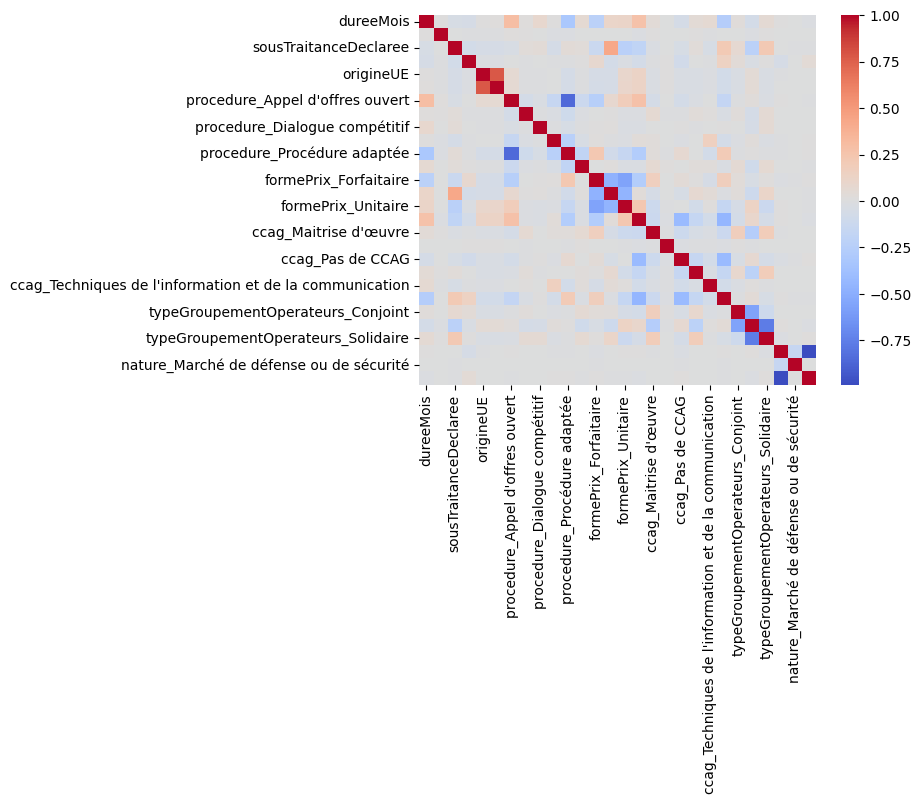

In [80]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

# Do it again, without the outliers

In [55]:
y_no = data_no['montant']
X_no = data_no[['procedure', 'dureeMois','nature', 'formePrix', 'offresRecues', 'ccag',
          'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance', 'origineUE',
          'origineFrance']]

In [56]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X_no[['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature']])

OneHotEncoder(sparse_output=False)

In [57]:
X_no = X_no.drop(columns=['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature'])

In [58]:
X_no.dureeMois = X_no.dureeMois.replace(np.nan, 1)
X_no.offresRecues = X_no.offresRecues.replace(np.nan, 1)
X_no.sousTraitanceDeclaree = X_no.sousTraitanceDeclaree.replace(np.nan, 0)
X_no.tauxAvance = X_no.tauxAvance.replace(np.nan, 0)
X_no.origineFrance = X_no.origineFrance.replace(np.nan, 0)
X_no.origineUE = X_no.origineUE.replace(np.nan, 0)

In [59]:
X_no_train, X_no_test, y_no_train, y_no_test = train_test_split(X_no, y_no, test_size=0.2)
model_no = LinearRegression()
model_no.fit(X_no_train, y_no_train)

LinearRegression()

In [60]:
cv_results_no = cross_validate(model_no, X_no_train, y_no_train, cv=5)
cv_results_no

{'fit_time': array([0.10369682, 0.1520257 , 0.11612225, 0.06356001, 0.13908362]),
 'score_time': array([0.01579809, 0.01270986, 0.01693344, 0.0060513 , 0.01766086]),
 'test_score': array([ 7.44264202e-05, -1.39315585e-05, -3.03383950e-05,  2.55098878e-05,
        -1.79743589e-04])}

# Dummy Regressor

In [61]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()
dummy.fit(X_no_train, y_no_train)
dummy.score(X_no_test, y_no_test)

-7.889785176073971e-06

In [62]:
cv_results_dummy = cross_validate(dummy, X_no_test, y_no_test, cv=5)
cv_results_dummy

{'fit_time': array([0.02613497, 0.01458597, 0.01460528, 0.0192368 , 0.01490784]),
 'score_time': array([0.00439739, 0.00580549, 0.00542355, 0.00493765, 0.00435948]),
 'test_score': array([-1.12912932e+04, -8.66773320e-12, -2.39808173e-13, -1.74035821e-04,
        -1.27456167e+02])}